In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## Data Cleaning

In [2]:
#detect the face and eyes and crop that image and store it in some different folder

In [3]:
img = cv2.imread("C:/Users/VISHAL/Downloads/1stop/messi2.jpg")

In [4]:
img.shape

(533, 800, 3)

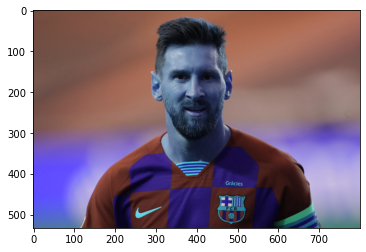

In [5]:
plt.imshow(img)

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )
gray.shape

(533, 800)

In [7]:
gray

array([[ 76,  76,  76, ..., 112, 112, 112],
       [ 76,  76,  76, ..., 111, 111, 111],
       [ 76,  76,  76, ..., 111, 111, 111],
       ...,
       [126, 127, 127, ..., 118, 117, 117],
       [126, 126, 126, ..., 117, 117, 117],
       [126, 126, 126, ..., 117, 117, 117]], dtype=uint8)

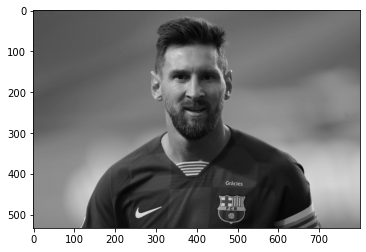

In [8]:
plt.imshow(gray,cmap='gray')

## Detect face and eyes of any image so that we can drop those images

In [9]:
face_cascade = cv2.CascadeClassifier("C:/Users/VISHAL/Downloads/1stop/OpenCv-Haarcascade-XML-files/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("C:/Users/VISHAL/Downloads/1stop/OpenCv-Haarcascade-XML-files/haarcascade_eye.xml")
nose_cascade = cv2.CascadeClassifier("C:/Users/VISHAL/Downloads/1stop/OpenCv-Haarcascade-XML-files/Nariz.xml")
faces = face_cascade.detectMultiScale(gray,1.3,5)
nose = nose_cascade.detectMultiScale(gray,1.3,5)
faces

array([[299,  91, 194, 194]], dtype=int32)

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h

(299, 91, 194, 194)

In [11]:
(x,y,w,h) = nose[0]
x,y,w,h

(363, 191, 33, 55)

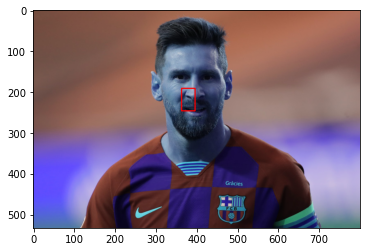

In [12]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

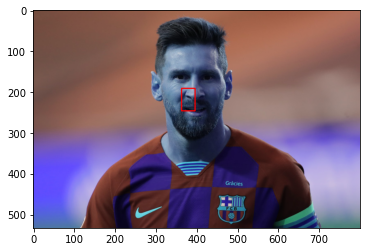

In [13]:
nose_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(nose_img)

<function matplotlib.pyplot.show(close=None, block=None)>

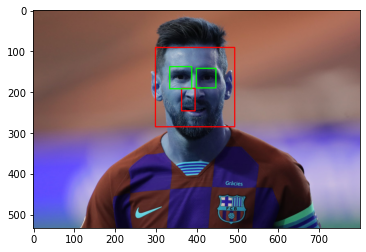

In [14]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces :
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    nose_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show

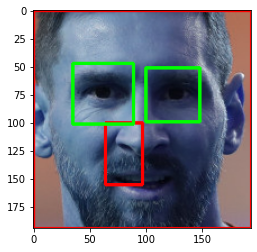

In [15]:
cropped_img = np.array(roi_color)
cropped_img.shape
plt.imshow(roi_color,cmap='gray')


# wavelet transformation

In [16]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor( imArray, cv2.COLOR_RGB2GRAY )
    imArray = np.float32(imArray)
    imArray /= 255;
    coeffs = pywt.wavedec2(imArray, mode, level = level)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

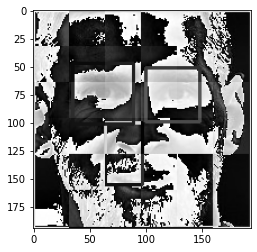

In [17]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har,cmap='gray')

In [28]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(roi_gray, 1.3, 5)
    for (a,b,c,d) in faces:
        roi_gray = gray[b:b+d, a:a+c]
        roi_color = img[b:b+d, a:a+c]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color

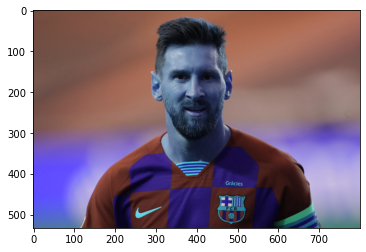

In [29]:
original_image = cv2.imread("C:/Users/VISHAL/Downloads/1stop/messi2.jpg")
plt.imshow(original_image)

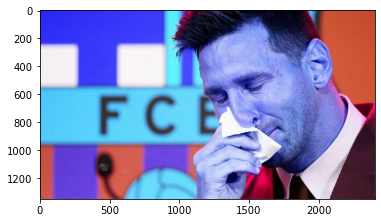

In [30]:
cropped_img = cv2.imread("C:/Users/VISHAL/Downloads/1stop/messi3.jpg")
plt.imshow(cropped_img)

In [31]:
cropped_img_no_2_eyes = get_cropped_image_if_2_eyes("C:/Users/VISHAL/Downloads/1stop/messi3.jpg")
cropped_img_no_2_eyes

UnboundLocalError: local variable 'roi_gray' referenced before assignment